 # 한강의 작품인 채식주의자의 맨부커상 수상에 따른 반응 분석

# GET

In [9]:
import requests
import lxml.html
import csv
import numpy
from konlpy.tag import Twitter
from sklearn.feature_extraction.text import CountVectorizer
import operator
from wordcloud import WordCloud
from matplotlib import pyplot
import networkx

# 수상확정 이전의 스크래핑을 위한 URL 설정

In [30]:
response = requests.get('http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C7%D1%B0%AD+%C3%A4%BD%C4%C1%D6%C0%C7%C0%DA&x=13&y=9&sm=all.basic&pd=4&startDate=1990-01-01&endDate=2016-05-16')

In [3]:
response

<Response [200]>

In [4]:
root = lxml.html.fromstring(response.text)

# 기사 제목과 주소 추출 일부

In [5]:
for node in root.xpath('.//a[@class="tit"]'):
    print(node.text_content(), node.attrib['href'])

[단독] 작가 한강이 '채식주의자'를 통해 표현하고자 한 것 http://www.ytn.co.kr/_ln/0104_201605160526084774
맨부커상 후보작 한강의 '채식주의자'는 어떤 소설? http://news1.kr/photos/view/?1930159
맨부커상 후보작 한강의 <채식주의자>는 어떤 소설? http://www.ohmynews.com/NWS_Web/View/at_pg.aspx?CNTN_CD=A0002209745
한강 맨부커상, 중국 옌렌커와 2파전 예상 http://news.heraldcorp.com/view.php?ud=20160516000155
연작집 '채식주의자'는 어떤 소설? http://www.ytn.co.kr/_ln/0106_201605160526394026
"실험적인 한국 젊은 소설… 위대한 작가 많아" http://news.chosun.com/site/data/html_dir/2016/05/16/2016051600003.html
'맨부커상' 후보, 한강 '채식주의자' '문학 한류'일으킬까 http://www.newsis.com/ar_detail/view.html?ar_id=NISX20160514_0014083773&cID=10701&pID=10700
[칼럼] 채식주의자 http://www.brainmedia.co.kr/brainWorldMedia/ContentView.aspx?contIdx=17884
맨부커상 후보 한강 '채식주의자' 오늘 옹달샘터 낭독회 http://www.ggilbo.com/news/articleView.html?idxno=281948
맨부커상 홈페이지는 한강 소설을 어떻게 소개하고 있을까 http://news.kmib.co.kr/article/view.asp?arcid=0010616545&code=61171111&cp=nv


# 본문 내용의 주소 추출

In [5]:
for node in root.xpath('.//a[@class="go_naver"]'):
    print(node.text_content(),node.attrib['href'])

네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=052&aid=0000838828
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=021&aid=0002275221
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=004&oid=052&aid=0000839505
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=052&aid=0000839507
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=421&aid=0002056049
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=001&aid=0008405183
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=421&aid=0002056897
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=421&aid=0002056149
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=047&aid=0002115961
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=016&aid=0001049900
네이버뉴스 http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=103&oid=052&aid=0000838831

In [6]:
for node in root.xpath('.//a[@class="go_naver"]'):
    url = node.attrib['href']
    res = requests.get(url)
    root = lxml.html.fromstring(res.text)
    content = root.xpath('.//div[@id="articleBodyContents"]')[0]    
    print([node.text_content(), url, content.text_content()])

['네이버뉴스', 'http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=104&oid=052&aid=0000838828', "\r\n\t\r\n\t\r\n\t\n\n[앵커] \n소설가 한강 씨가 최종 후보에 오른 맨부커상 인터내셔널 부문 최종 수상자가 우리 시각 내일 새벽 영국 런던에서 발표됩니다. \n \n한강 씨는 시상식 전야 행사에 참석해 후보작인 채식주의자를 통해 인간의 본성을 탐구하고자 했다고 말했습니다. \n \n런던에서 김응건 특파원이 보도합니다. \n \n[기자] \n지난 2007년 발표된 연작 소설 '채식주의자'가 작가 한강 씨의 육성으로 영국 도서관 회의장에 울려 퍼집니다. \n \n[한 강 / 작가 : 저 나무는 그녀에게 무엇인가 말하는 것 같았는데, 비에 잠긴 오늘은 할 말을 안으로 감춘 과묵한 사람 같다.] \n \n맨부커상 인터내셔널 부문 최종 후보에 오른 작품들을 모두 소개하는 자리, 채식주의자를 번역한 영국인 데보라 스미스 씨도 주인공 영혜의 복잡한 내면 세계를 실감 나게 그려냅니다, \n \n[데버러 스미스 / '채식주의자' 번역 : 그 (창살) 사이로 얼굴을 내민 환자를 보기 어렵지만, 이런 날씨에는 비를 구경하는 환자들의 회색 얼굴이 여럿 보인다.] \n \n한강 씨는 현장 토론회에서 채식주의자를 통해 억압받는 인간의 내면 세계를 표현하고 싶었다고 밝혔습니다. \n \n지난해 1월 영국에서 출판된 채식주의자는 현지 언론의 베스트셀러로 선정되는 등 큰 관심을 받았습니다. \n \n[데보라 스미스 / '채식주의자' 번역 : 이 책이 인간의 보편적 본성에 호소해 더 많은 독자가 찾을 잠재력이 있습니다.] \n \n영국에서 영어로 번역돼 출간된 단행본 소설을 대상으로 하는 맨부커상 인터내셔널 부문에는 모두 6명이 후보에 올랐습니다. \n \n터키의 노벨문학상 수상자 오르한 파묵의 '내 마음 속의 기이함'을 비롯해 유럽과 아시아, 아프리카 등 세계 각국의 내로라하는 작가들이 경쟁하고 

In [7]:
def extract(url, path):
    res = requests.get(url)
    #res.encoding = 'utf8'
    root = lxml.html.fromstring(res.text)
    return root.xpath(path)

In [8]:
link_url2 = 'http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C7%D1%B0%AD+%C3%A4%BD%C4%C1%D6%C0%C7%C0%DA&x=13&y=9&sm=all.basic&pd=4&startDate=1990-01-01&endDate=2016-05-16&page={}'

# 수상 전 스크래핑한 기사내용 파일 저장

In [9]:
with open('19900101-20160516.csv', 'w', encoding='utf8') as f:
    w = csv.writer(f)
    cnt = 743 % 10
    if cnt > 0 :
        i = (743//10)+2
    for page in range(1, i):
        #res = requests.get(link_url2.format(i))
        res = requests.get(link_url2.format(page))
        element = lxml.html.fromstring(res.text)
        for node in element.xpath('.//a[@class="go_naver"]'):
            try:
                url = node.attrib['href']
                body = extract(url,'.//div[@id="articleBodyContents"]')[0]   
                #print([node.text_content(), url, body.text_content()])
                #print(node.text_content(),node.attrib['href'])
                w.writerow([body.text_content()])
            except : 
                continue

# 수상확정 이후의 스크래핑을 위한 URL 설정

In [10]:
after_link_url = 'http://news.naver.com/main/search/search.nhn?refresh=&so=rel.dsc&stPhoto=&stPaper=&stRelease=&ie=MS949&detail=0&rcsection=&query=%C7%D1%B0%AD+%C3%A4%BD%C4%C1%D6%C0%C7%C0%DA&x=11&y=5&sm=all.basic&pd=4&startDate=2015-05-17&endDate=2016-05-29&page={}'

# 수상 후 스크래핑한 기사내용 파일 저장

In [11]:
with open('20160517-20160529.csv', 'w', encoding='utf8') as f:
    w = csv.writer(f)
    cnt = 1996 % 10
    if cnt > 0 :
        i = (1996//10)+2
    for page in range(1, i):
        #res = requests.get(url.format(i))
        res = requests.get(after_link_url.format(page))  # 기사 목록
        element = lxml.html.fromstring(res.text)
        for node in element.xpath('.//a[@class="go_naver"]'):
            try:
                url = node.attrib['href']
                body = extract(url,'.//div[@id="articleBodyContents"]')[0]   
                #print([node.text_content(), url, body.text_content()])
                #print(node.text_content(),node.attrib['href'])
                w.writerow([body.text_content()])
            except : 
                continue

# 서점 사이트에서 한강 채식주의자를 읽은 독자 서평을 비교하기 위한 작업이었으나 미완성

In [13]:
kyobo_url='http://www.kyobobook.co.kr/product/detailViewMultiPopup.laf?pageGb=KOR&popupMode=memberReviewDetail&ejkGb=KOR&barcode=9788936433598&sortColumn=recommend_cnt'

In [44]:
kyobo_url_reply = 'http://www.kyobobook.co.kr/product/productSimpleReviewSort.laf?barcode=9788936433598&ejkGb=KOR&mallGb=&sortType=date&pageNumber={}'

In [47]:
with open('kyobo_commnet.csv', 'w', encoding='utf8') as f:
    w = csv.writer(f)
    for page in range(1, 7):
        response2 = requests.get(kyobo_url_reply.format(page))
        #response2 = requests.get(kyobo_url_reply)
        root2 = lxml.html.fromstring(response2.text)
        for node in root2.xpath('.//div[@class="txt"]'):
            #print(node.text_content())
            w.writerow([node.text_content()])

# 수상 전 반응의 텍스트 분석

In [10]:
before = []
with open('19900101-20160516.csv', encoding='utf8',newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        before.append(row[0])

In [56]:
before[0]

"\r\r\n\t\r\r\n\t\r\r\n\t\r\n\r\n[앵커] \r\n소설가 한강 씨가 최종 후보에 오른 맨부커상 인터내셔널 부문 최종 수상자가 우리 시각 내일 새벽 영국 런던에서 발표됩니다. \r\n \r\n한강 씨는 시상식 전야 행사에 참석해 후보작인 채식주의자를 통해 인간의 본성을 탐구하고자 했다고 말했습니다. \r\n \r\n런던에서 김응건 특파원이 보도합니다. \r\n \r\n[기자] \r\n지난 2007년 발표된 연작 소설 '채식주의자'가 작가 한강 씨의 육성으로 영국 도서관 회의장에 울려 퍼집니다. \r\n \r\n[한 강 / 작가 : 저 나무는 그녀에게 무엇인가 말하는 것 같았는데, 비에 잠긴 오늘은 할 말을 안으로 감춘 과묵한 사람 같다.] \r\n \r\n맨부커상 인터내셔널 부문 최종 후보에 오른 작품들을 모두 소개하는 자리, 채식주의자를 번역한 영국인 데보라 스미스 씨도 주인공 영혜의 복잡한 내면 세계를 실감 나게 그려냅니다, \r\n \r\n[데버러 스미스 / '채식주의자' 번역 : 그 (창살) 사이로 얼굴을 내민 환자를 보기 어렵지만, 이런 날씨에는 비를 구경하는 환자들의 회색 얼굴이 여럿 보인다.] \r\n \r\n한강 씨는 현장 토론회에서 채식주의자를 통해 억압받는 인간의 내면 세계를 표현하고 싶었다고 밝혔습니다. \r\n \r\n지난해 1월 영국에서 출판된 채식주의자는 현지 언론의 베스트셀러로 선정되는 등 큰 관심을 받았습니다. \r\n \r\n[데보라 스미스 / '채식주의자' 번역 : 이 책이 인간의 보편적 본성에 호소해 더 많은 독자가 찾을 잠재력이 있습니다.] \r\n \r\n영국에서 영어로 번역돼 출간된 단행본 소설을 대상으로 하는 맨부커상 인터내셔널 부문에는 모두 6명이 후보에 올랐습니다. \r\n \r\n터키의 노벨문학상 수상자 오르한 파묵의 '내 마음 속의 기이함'을 비롯해 유럽과 아시아, 아프리카 등 세계 각국의 내로라하는 작가들이 경쟁하고 있습니다. \r\n \r\n맨부커상 인터내셔널 부문에 우리 작가가 최종 

In [11]:
tagger = Twitter()

In [12]:
cv = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [13]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=50, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method Twitter.nouns of <konlpy.tag._twitter.Twitter object at 0x0000000008791A58>>,
        vocabulary=None)

In [14]:
tdm_before = cv.fit_transform(before)

In [7]:
tdm_before

<611x50 sparse matrix of type '<class 'numpy.int64'>'
	with 15520 stored elements in Compressed Sparse Row format>

In [47]:
tdm_before.todense()

matrix([[1, 2, 0, ..., 2, 0, 5],
        [2, 1, 4, ..., 1, 0, 1],
        [1, 2, 0, ..., 1, 0, 5],
        ..., 
        [1, 1, 1, ..., 1, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [0, 5, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
words = cv.get_feature_names()
words

['간',
 '것',
 '고',
 '국문학',
 '그',
 '기자',
 '년',
 '대한',
 '더',
 '도서전',
 '독자',
 '등',
 '때',
 '를',
 '만',
 '맨부커상',
 '문학',
 '문학상',
 '문화',
 '미국',
 '번역',
 '사람',
 '서울',
 '세계',
 '소설',
 '소설가',
 '수',
 '씨',
 '영국',
 '영혜',
 '월',
 '의',
 '이',
 '인간',
 '일',
 '일본',
 '작가',
 '작품',
 '재',
 '중',
 '채식주의자',
 '책',
 '최종',
 '출판',
 '출판사',
 '프랑스',
 '한강',
 '한국',
 '해외',
 '후보']

In [1]:
exclude = ['무단', '전재','배포','금지']

In [7]:
def get_word(doc):
    nouns = tagger.nouns(doc)
    return [noun for noun in nouns if (len(noun) > 1) and (noun not in exclude)]

In [17]:
cv = CountVectorizer(tokenizer=get_word, max_features=50)

In [18]:
tdm_before = cv.fit_transform(before)

In [65]:
tdm_before.todense()

matrix([[1, 0, 1, ..., 2, 0, 5],
        [1, 0, 1, ..., 1, 0, 1],
        [1, 0, 1, ..., 1, 0, 5],
        ..., 
        [0, 0, 1, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
words = cv.get_feature_names()
words

['관심',
 '국내',
 '국문학',
 '기자',
 '뉴스',
 '다른',
 '대한',
 '도서전',
 '독자',
 '때문',
 '맨부커상',
 '문학',
 '문학상',
 '문화',
 '미국',
 '번역',
 '번역가',
 '사람',
 '서울',
 '선정',
 '세계',
 '소년',
 '소설',
 '소설가',
 '수상자',
 '시간',
 '영국',
 '영어',
 '영혜',
 '영화',
 '올해',
 '욕망',
 '우리',
 '이야기',
 '인간',
 '일본',
 '작가',
 '작품',
 '채식주의자',
 '최종',
 '출판',
 '출판사',
 '통해',
 '폭력',
 '프랑스',
 '한강',
 '한국',
 '한국인',
 '해외',
 '후보']

In [20]:
count_matrix = tdm_before.sum(axis=0)

In [68]:
count_matrix

matrix([[ 418,  654,  456,  596,  395,  365,  787,  491,  510,  402,  999,
          437, 1475,  509,  586,  576,  443, 1099,  378,  716,  544,  485,
          894, 1961,  726,  430,  369,  848,  415,  525,  378,  388,  470,
          477,  654,  686, 2552, 1554,  426, 1581,  752,  618,  546,  480,
          406,  500, 1986, 2791,  560, 1349]], dtype=int64)

In [21]:
count = numpy.squeeze(numpy.asarray(count_matrix))

In [20]:
count

array([ 418,  654,  456,  596,  395,  365,  787,  491,  510,  402,  999,
        437, 1475,  509,  586,  576,  443, 1099,  378,  716,  544,  485,
        894, 1961,  726,  430,  369,  848,  415,  525,  378,  388,  470,
        477,  654,  686, 2552, 1554,  426, 1581,  752,  618,  546,  480,
        406,  500, 1986, 2791,  560, 1349], dtype=int64)

In [22]:
word_count = list(zip(words, count))

In [23]:
word_count

[('관심', 418),
 ('국내', 359),
 ('국문학', 654),
 ('기자', 596),
 ('뉴스', 395),
 ('다른', 365),
 ('대한', 787),
 ('도서전', 491),
 ('독자', 510),
 ('때문', 402),
 ('맨부커상', 999),
 ('문학', 1475),
 ('문학상', 509),
 ('문화', 586),
 ('미국', 576),
 ('번역', 1099),
 ('번역가', 378),
 ('사람', 716),
 ('서울', 544),
 ('선정', 485),
 ('세계', 894),
 ('소년', 350),
 ('소설', 1961),
 ('소설가', 726),
 ('수상자', 430),
 ('시간', 369),
 ('영국', 848),
 ('영어', 415),
 ('영혜', 525),
 ('영화', 378),
 ('올해', 351),
 ('욕망', 388),
 ('우리', 470),
 ('이야기', 477),
 ('인간', 654),
 ('일본', 686),
 ('작가', 2552),
 ('작품', 1554),
 ('채식주의자', 1581),
 ('최종', 752),
 ('출판', 618),
 ('출판사', 546),
 ('통해', 480),
 ('폭력', 406),
 ('프랑스', 500),
 ('한강', 1986),
 ('한국', 2791),
 ('한국인', 345),
 ('해외', 560),
 ('후보', 1349)]

In [24]:
sorted(word_count, key=operator.itemgetter(1), reverse=True)

[('한국', 2791),
 ('작가', 2552),
 ('한강', 1986),
 ('소설', 1961),
 ('채식주의자', 1581),
 ('작품', 1554),
 ('문학', 1475),
 ('후보', 1349),
 ('번역', 1099),
 ('맨부커상', 999),
 ('세계', 894),
 ('영국', 848),
 ('대한', 787),
 ('최종', 752),
 ('소설가', 726),
 ('사람', 716),
 ('일본', 686),
 ('국문학', 654),
 ('인간', 654),
 ('출판', 618),
 ('기자', 596),
 ('문화', 586),
 ('미국', 576),
 ('해외', 560),
 ('출판사', 546),
 ('서울', 544),
 ('영혜', 525),
 ('독자', 510),
 ('문학상', 509),
 ('프랑스', 500),
 ('도서전', 491),
 ('선정', 485),
 ('통해', 480),
 ('이야기', 477),
 ('우리', 470),
 ('수상자', 430),
 ('관심', 418),
 ('영어', 415),
 ('폭력', 406),
 ('때문', 402),
 ('뉴스', 395),
 ('욕망', 388),
 ('번역가', 378),
 ('영화', 378),
 ('시간', 369),
 ('다른', 365),
 ('국내', 359),
 ('올해', 351),
 ('소년', 350),
 ('한국인', 345)]

In [25]:
%matplotlib inline

In [26]:
wc = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white',width=400, height=500)
cloud = wc.generate_from_frequencies(word_count)

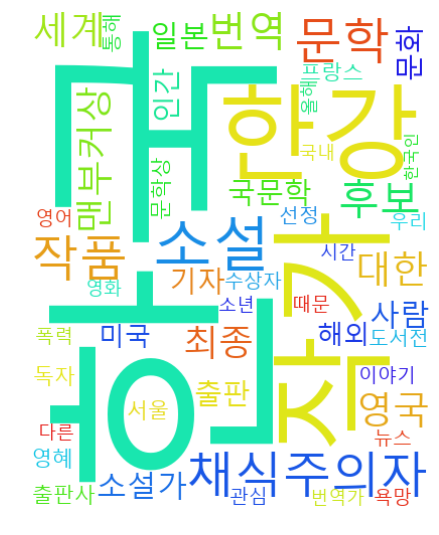

In [27]:
pyplot.figure(figsize=(100, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [28]:
word_corr = numpy.corrcoef(tdm_before.todense(), rowvar=0)

In [31]:
word_corr

array([[ 1.        ,  0.24044438, -0.06356237, ...,  0.7472291 ,
         0.35812142, -0.12374389],
       [ 0.24044438,  1.        , -0.07004033, ...,  0.15894288,
         0.21088207, -0.15271449],
       [-0.06356237, -0.07004033,  1.        , ..., -0.11687249,
        -0.04613347, -0.02646696],
       ..., 
       [ 0.7472291 ,  0.15894288, -0.11687249, ...,  1.        ,
         0.28140922, -0.09152474],
       [ 0.35812142,  0.21088207, -0.04613347, ...,  0.28140922,
         1.        , -0.0053348 ],
       [-0.12374389, -0.15271449, -0.02646696, ..., -0.09152474,
        -0.0053348 ,  1.        ]])

In [29]:
edges = []
for i in range(len(words)):
    for j in range(i+1, len(words)):
        edges.append((words[i],words[j],word_corr[i,j]))

In [30]:
edges=sorted(edges, key=operator.itemgetter(2), reverse=True)

In [31]:
edges=edges[:50]

In [32]:
edges

[('맨부커상', '후보', 0.84887823857228495),
 ('한국', '한국인', 0.81362822773953691),
 ('문화', '한국', 0.76729545425881518),
 ('관심', '한국', 0.74722910410305921),
 ('최종', '후보', 0.73249272934565302),
 ('선정', '후보', 0.72551580281122152),
 ('도서전', '출판', 0.71327939939865626),
 ('일본', '한국', 0.69938783602259036),
 ('다른', '사람', 0.68511697210277389),
 ('맨부커상', '최종', 0.6825374377111636),
 ('국문학', '번역', 0.68000293699093051),
 ('대한', '한국', 0.67087496660566481),
 ('사람', '한국', 0.66191743598843877),
 ('다른', '대한', 0.66073910576868866),
 ('다른', '한국인', 0.65425724962769882),
 ('다른', '한국', 0.64935957615821127),
 ('영어', '한국인', 0.64933827858494753),
 ('관심', '대한', 0.64006317811747004),
 ('대한', '문화', 0.6354639323113509),
 ('맨부커상', '선정', 0.63403955550901858),
 ('인간', '폭력', 0.62608102578638403),
 ('문학상', '후보', 0.62539314179860495),
 ('영어', '한국', 0.62428495101955905),
 ('사람', '한국인', 0.62176193913742062),
 ('문화', '한국인', 0.61606223431034379),
 ('관심', '문화', 0.6071071749145095),
 ('작가', '작품', 0.60292240207327819),
 ('미국', '한국', 0.5

In [33]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [(weight) for word1, word2, weight in edges]

In [34]:
gg = networkx.Graph()
for word1, word2, weight in edges:
    gg.add_edge(word1, word2, weight=weight) 

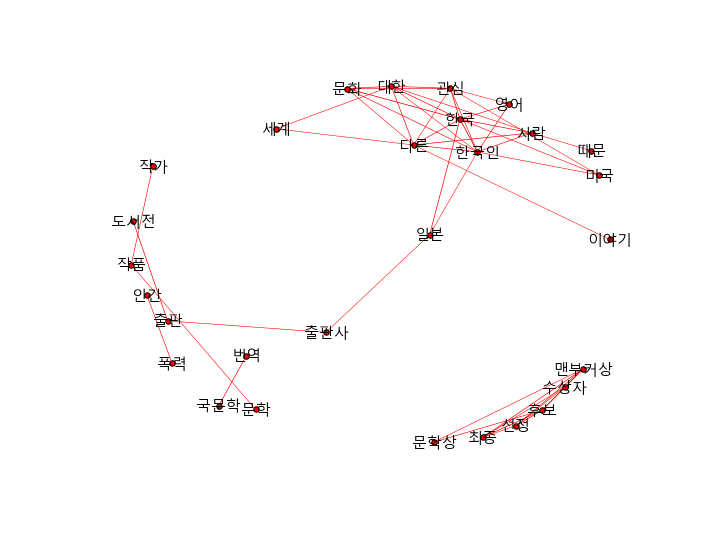

In [35]:
position = networkx.spring_layout(gg, iterations=30)
pyplot.figure(figsize=(12,9))
networkx.draw_networkx_nodes(gg, position, node_size=30)
networkx.draw_networkx_edges(gg, position, edgelist=edge_list, width=weight_list, edge_color='red')
networkx.draw_networkx_labels(gg, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

# 수상 후 반응의 텍스트 분석

In [36]:
after = []
with open('20160517-20160529.csv', encoding='utf8',newline='\r\n') as f:
    reader = csv.reader(f)
    for row in reader:
        after.append(row[0])

In [2]:
after[0]

'\r\r\n\t\r\r\n\t\r\r\n\t\r\n \r\n  \r\n  \r\n   \r\n\t\r\n   \r\n   소설 \'채식주의자\'의 주인공 영혜는 \'타자와 하나 되기 위해\' 나무가 되려 한다. 사진은 맨부커 상 수상 후 서점가에서 다시 베스트셀러가 된 한강의 \'채식주의자\'.  부산일보DB\r\n  \r\n   \r\n 타자와 하나 되려는 꿈의 몸짓\r\n 평범한 가정주부이던 영혜는 어느 날 갑자기 채식을 단행한다. 냉장고의 모든 고기를 내다버린다. 남편이 이유를 묻자, 꿈을 꾸었기 때문이라고 말한다. 피가 뚝뚝 흐르는 고깃덩어리들 한가운데를 헤매는 꿈이었다. 피 웅덩이에 비친 자신의 눈을 보았다. 익숙하면서도 낯선 얼굴이었다. 다른 한쪽에서는 고기 굽는 냄새가 났고 노랫소리, 즐거운 음악소리도 들려왔다. 약육강식, 선혈 낭자한 우리 현대사를 압축한 꿈이었다.영혜의 채식 결단은 악몽의 현실에서 깨어나는 견성(見性)의 순간이었다. 다른 이의 시선에 아랑곳하지 않고 브래지어도 하지 않는 여자, 영혜는 점점 말라간다. 남편을 비롯한 가족들은 영혜를 이해하지 못한다. 특히 아버지는 영혜의 입을 강제로 벌려 고기를 밀어 넣는 폭력마저 행사한다. 그는 월남전에 참전하여 훈장도 받고, 베트콩도 여럿 죽였다고 자랑하는 그런 사람이다.약육강식…폭력…통제… 독점자본·권력의 변형 이에 저항하는 방식이 채식 온몸에 잎과 뿌리가 돋아 아예 나무가 되려는 꿈은 타인 향한 절절한 그리움독점 자본과 독재 권력이 통제하는 \'규율\' 사회 내에서의 명령과 복종에 순치된 좀비인간인 아버지. 딸에게 폭력을 행사하는 순간, 그 딸은 아버지에게 또 다른 베트콩으로 보였을 것이다. 자신이 폭력의 도구가 되었다는 사실을 아버지는 절대로 깨닫지 못한다. 이해하지는 못하더라도 그대로 내버려둘 줄 아는 것, 즉 판단 중지는 타자를 인간으로 대접하는 최소한의 예의다. 영혜는 자해로써 저항하고 정신병원에 갇힌다.영혜는 자신의 몸 중에서 젖가슴만을 좋아한다고 말한다. 손도, 발도, 이빨과 

In [4]:
tagger = Twitter()

In [37]:
cv_after = CountVectorizer(tokenizer=tagger.nouns, max_features=50)

In [38]:
tdm_after = cv_after.fit_transform(after)
tdm_after

<2428x50 sparse matrix of type '<class 'numpy.int64'>'
	with 65286 stored elements in Compressed Sparse Row format>

In [8]:
tdm_after.todense()

matrix([[  0,  11,   0, ...,   0,   0,   0],
        [  0,   2,   0, ...,   4,   0,   1],
        [  1,   8,   0, ...,   2,   0,   0],
        ..., 
        [  0,  12,   0, ...,   5,   2,   0],
        [  0,  69,   3, ..., 150,   0,   0],
        [  0,   7,   2, ...,   7,   0,   1]], dtype=int64)

In [39]:
words_after = cv_after.get_feature_names()
words_after

['간',
 '것',
 '고',
 '국문학',
 '그',
 '금지',
 '기자',
 '년',
 '뉴스',
 '대한',
 '독자',
 '등',
 '를',
 '맨부커상',
 '무단',
 '문학',
 '문학상',
 '배포',
 '번역',
 '번역가',
 '부문',
 '서울',
 '선정',
 '세계',
 '소설',
 '소설가',
 '수',
 '수상',
 '스미스',
 '씨',
 '영국',
 '우리',
 '월',
 '의',
 '이',
 '인간',
 '인터내셔널',
 '일',
 '작가',
 '작품',
 '재',
 '전재',
 '제',
 '채식주의자',
 '책',
 '최종',
 '한강',
 '한국',
 '핫',
 '후보']

In [40]:
cv_after = CountVectorizer(tokenizer=get_word, max_features=50)

In [41]:
tdm_after = cv_after.fit_transform(after)

In [36]:
tdm_after.todense()

matrix([[ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  0,  1, ...,  0,  1,  1],
        [ 1,  0,  1, ...,  0,  0,  0],
        ..., 
        [ 0,  0,  1, ...,  0,  0,  0],
        [ 0,  1,  0, ..., 34,  4,  0],
        [ 0,  0,  0, ...,  2,  0,  1]], dtype=int64)

In [42]:
words_after = cv_after.get_feature_names()

In [43]:
words_after

['관심',
 '국문학',
 '권위',
 '기자',
 '노벨문학상',
 '뉴스',
 '대한',
 '독자',
 '런던',
 '맨부',
 '맨부커상',
 '문학',
 '문학상',
 '번역',
 '번역가',
 '부문',
 '사람',
 '서울',
 '선정',
 '세계',
 '소년',
 '소설',
 '소설가',
 '수상',
 '수상자',
 '수상작',
 '수상한',
 '스미스',
 '시간',
 '연합뉴스',
 '영국',
 '영어',
 '우리',
 '이번',
 '인간',
 '인터내셔널',
 '작가',
 '작품',
 '질문',
 '채식주의자',
 '처음',
 '최종',
 '최초',
 '폭력',
 '프랑스',
 '한강',
 '한국',
 '한국인',
 '해외',
 '후보']

In [44]:
count_matrix = tdm_after.sum(axis=0)

In [40]:
count_matrix

matrix([[ 1847,  1132,  1935,  2637,  1411,  2097,  1873,  1522,  1227,
          1343,  7060,  1914,  3253,  3080,  1913,  3254,  1881,  2028,
          2182,  1559,  4094,  1072,  6993,  3403,  4510,  1436,  1451,
          1297,  2072,  1353,  3556,  1149,  1542,  1223,  1611,  2838,
          6887,  4563,  1791,  1330,  7398,  1542,  1288,  1424,  1128,
         10438,  4321,  1425,  1203,  2508]], dtype=int64)

In [45]:
count = numpy.squeeze(numpy.asarray(count_matrix))
count

array([ 1056,  1847,  1132,  2637,  1411,  2097,  1873,  1522,  1227,
        1343,  7060,  3253,  3080,  3254,  1881,  2028,  1054,  2182,
        1559,  4094,  1072,  6993,  3403,  4510,  1436,  1451,  1297,
        2072,  1353,  1068,  3556,  1149,  1542,  1223,  1611,  2838,
        6887,  4563,  1330,  7398,  1053,  1542,  1288,  1424,  1128,
       10438,  4321,  1425,  1203,  2508], dtype=int64)

In [46]:
a_word_count = list(zip(words_after, count))

In [58]:
a_word_count

[('관심', 1056),
 ('국문학', 1847),
 ('권위', 1132),
 ('기자', 2637),
 ('노벨문학상', 1411),
 ('뉴스', 2097),
 ('대한', 1873),
 ('독자', 1522),
 ('런던', 1227),
 ('맨부', 1343),
 ('맨부커상', 7060),
 ('문학', 3253),
 ('문학상', 3080),
 ('번역', 3254),
 ('번역가', 1881),
 ('부문', 2028),
 ('사람', 1054),
 ('서울', 2182),
 ('선정', 1559),
 ('세계', 4094),
 ('소년', 1072),
 ('소설', 6993),
 ('소설가', 3403),
 ('수상', 4510),
 ('수상자', 1436),
 ('수상작', 1451),
 ('수상한', 1297),
 ('스미스', 2072),
 ('시간', 1353),
 ('연합뉴스', 1068),
 ('영국', 3556),
 ('영어', 1149),
 ('우리', 1542),
 ('이번', 1223),
 ('인간', 1611),
 ('인터내셔널', 2838),
 ('작가', 6887),
 ('작품', 4563),
 ('질문', 1330),
 ('채식주의자', 7398),
 ('처음', 1053),
 ('최종', 1542),
 ('최초', 1288),
 ('폭력', 1424),
 ('프랑스', 1128),
 ('한강', 10438),
 ('한국', 4321),
 ('한국인', 1425),
 ('해외', 1203),
 ('후보', 2508)]

In [62]:
len(a_word_count)

50

In [63]:
import pandas

In [69]:
b_df = pandas.DataFrame(sort_a, columns=['word', 'cnt'])
b_df

,word,cnt
0,한강,10438
1,채식주의자,7398
2,맨부커상,7060
3,소설,6993
4,작가,6887
5,작품,4563
6,수상,4510
7,한국,4321
8,세계,4094
9,영국,3556


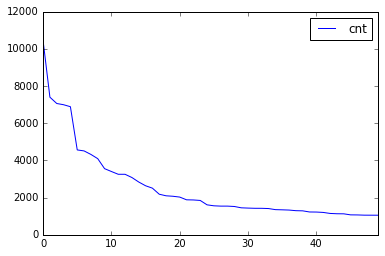

In [70]:
b_df.plot()

In [67]:
sort_a = sorted(a_word_count, key=operator.itemgetter(1), reverse=True)
sort_a

[('한강', 10438),
 ('채식주의자', 7398),
 ('맨부커상', 7060),
 ('소설', 6993),
 ('작가', 6887),
 ('작품', 4563),
 ('수상', 4510),
 ('한국', 4321),
 ('세계', 4094),
 ('영국', 3556),
 ('소설가', 3403),
 ('번역', 3254),
 ('문학', 3253),
 ('문학상', 3080),
 ('인터내셔널', 2838),
 ('기자', 2637),
 ('후보', 2508),
 ('서울', 2182),
 ('뉴스', 2097),
 ('스미스', 2072),
 ('부문', 2028),
 ('번역가', 1881),
 ('대한', 1873),
 ('국문학', 1847),
 ('인간', 1611),
 ('선정', 1559),
 ('우리', 1542),
 ('최종', 1542),
 ('독자', 1522),
 ('수상작', 1451),
 ('수상자', 1436),
 ('한국인', 1425),
 ('폭력', 1424),
 ('노벨문학상', 1411),
 ('시간', 1353),
 ('맨부', 1343),
 ('질문', 1330),
 ('수상한', 1297),
 ('최초', 1288),
 ('런던', 1227),
 ('이번', 1223),
 ('해외', 1203),
 ('영어', 1149),
 ('권위', 1132),
 ('프랑스', 1128),
 ('소년', 1072),
 ('연합뉴스', 1068),
 ('관심', 1056),
 ('사람', 1054),
 ('처음', 1053)]

In [30]:
%matplotlib inline

In [48]:
wc_a = WordCloud(font_path='C:\\Windows\\Fonts\\malgun.ttf', background_color='white',width=400, height=500)
cloud = wc_a.generate_from_frequencies(a_word_count)

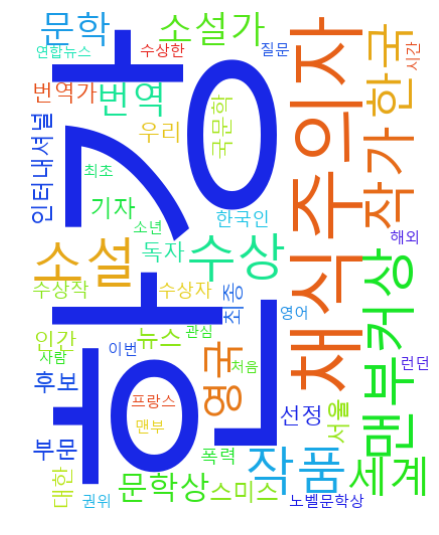

In [49]:
pyplot.figure(figsize=(100, 9))
pyplot.imshow(cloud)
pyplot.axis("off")
pyplot.show()

In [50]:
word_corr_after = numpy.corrcoef(tdm_after.todense(), rowvar=0)

In [51]:
edges = []
for i in range(len(words_after)):
    for j in range(i+1, len(words_after)):
        edges.append((words_after[i],words_after[j],word_corr_after[i,j]))

In [52]:
edges=sorted(edges, key=operator.itemgetter(2), reverse=True)

In [53]:
edges=edges[:50]

In [50]:
edges

[('무단', '배포', 0.98677104058890086),
 ('금지', '무단', 0.95638239679607684),
 ('금지', '배포', 0.95525319322401003),
 ('배포', '전재', 0.87062992109348747),
 ('무단', '전재', 0.86990115630044496),
 ('금지', '전재', 0.83633008423733635),
 ('최종', '후보', 0.79748950806131813),
 ('부문', '인터내셔널', 0.76225524103972431),
 ('맨부커상', '부문', 0.66868757542047075),
 ('선정', '후보', 0.65623504259579435),
 ('번역가', '스미스', 0.65580952156693595),
 ('최초', '한국인', 0.64092034179992641),
 ('국문학', '번역', 0.62698422319652991),
 ('선정', '최종', 0.58192667022577793),
 ('번역', '번역가', 0.58092864922628296),
 ('채식주의자', '한강', 0.57207034904522658),
 ('수상', '한강', 0.57115789010093931),
 ('맨부커상', '선정', 0.57030268053380706),
 ('맨부커상', '인터내셔널', 0.54956364940481639),
 ('맨부커상', '최초', 0.54797059570160433),
 ('인간', '폭력', 0.54625340040048687),
 ('번역', '스미스', 0.54586019761064664),
 ('문학', '작품', 0.53480514213102859),
 ('수상자', '최종', 0.52544688580087462),
 ('선정', '수상자', 0.52084728319904916),
 ('부문', '선정', 0.5177287981619616),
 ('작가', '작품', 0.5165486646493338),
 ('소설

In [54]:
edge_list = [(word1, word2) for word1, word2, weight in edges]
weight_list = [(weight) for word1, word2, weight in edges]

In [55]:
gg_after = networkx.Graph()

for word1, word2, weight in edges:
    gg_after.add_edge(word1, word2, weight=weight) 

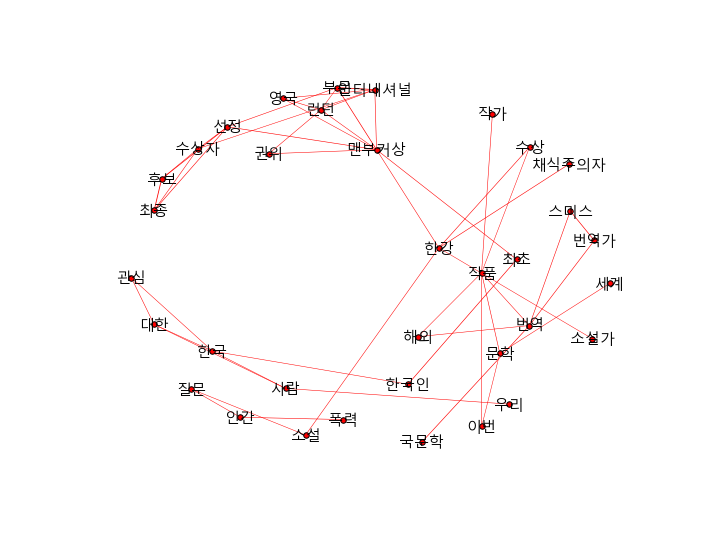

In [56]:
position = networkx.spring_layout(gg_after, iterations=30)
pyplot.figure(figsize=(12,9))
networkx.draw_networkx_nodes(gg_after, position, node_size=30)
networkx.draw_networkx_edges(gg_after, position, edgelist=edge_list, width=weight_list, edge_color='red')
networkx.draw_networkx_labels(gg_after, position, font_size=15, font_family='Malgun Gothic')
pyplot.axis('off')
pyplot.show()

In [ ]:
# 수상 전과 수상 후의 반응에 대한 분석으로
# 수상 전과 수상 후에 다르게 거론됐던 단어 중 수상 전에는 번역, 최종, 일본, 출판, 문화, 미국, 출판사, 영혜, 도서전, 욕망, 영화 등등이 있고
# 수상 후에는 노벨문학상, 런던, 스미스, 최초, 수상작, 권위 등이 거론되었는데

# 수상전에는 채식주의자 소설 내용과 관련된 영혜, 욕망에 관한 내용 언급과 이 소설이 영화화 된적이 있어서 영화에 대한 단어가 언급된 것으로 보인다
# 수상후에는 한국에서는 처음으로 맨부커상 수상작이 나왔으므로 최초라는 단어가, 맨부커상이 문학계의 노벨문학상이라고 소개되면서 그 단어와 더불어
# 수상이 결정됐으므로 수상작이란 단어 또한 거론된 것으로 파악된다.

# 수상 전과 수상 후에 동일하게 거론된 단어 중 한강, 채식주의, 맨부커상이 있는데 수상 전보다 수상 후에 앞선 단어들이 제일 많이 거론된 것으로 파악된다.